In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [6]:
reeses = cv2.imread("DATA/reeses_puffs.png",0)

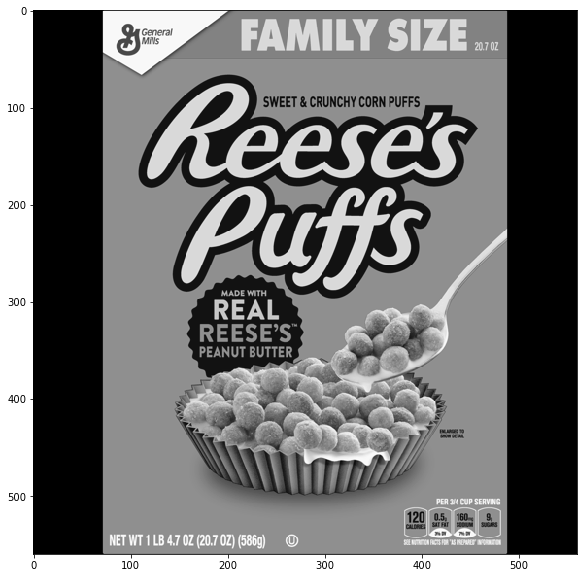

In [8]:
display(reeses)

In [9]:
cereals = cv2.imread("DATA/many_cereals.jpg",0)

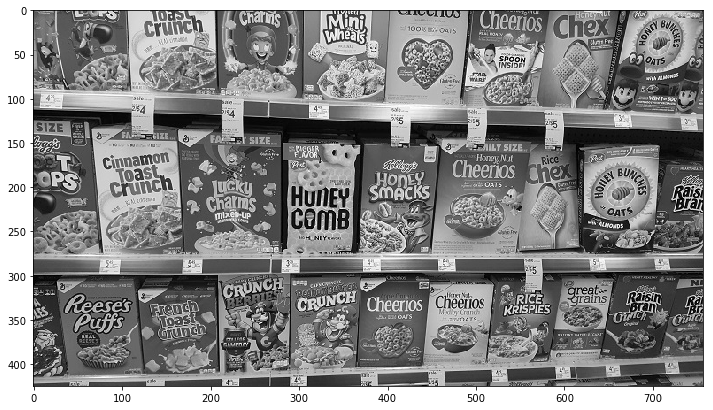

In [10]:
display(cereals)

In [11]:
orb = cv2.ORB_create()

In [12]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [13]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [14]:
matches = bf.match(des1,des2)

In [15]:
matches = sorted(matches,key=lambda x:x.distance)

In [16]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:27],None,flags=2)

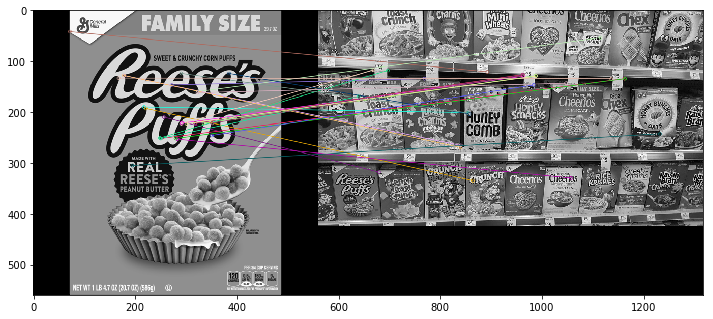

In [17]:
display(reeses_matches)

In [18]:
# Sift descriptor

In [19]:
sift = cv2.xfeatures2d.SIFT_create()

In [20]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [21]:
bf = cv2.BFMatcher()

In [24]:
matches = bf.knnMatch(des1,des2,k=2)

In [28]:
good = []

# Less distance == better match
# Ratio Test
for match1,match2 in matches:
    # If match1 distance is less than 75% of match2 distance
    # then descriptor was a good match, Lets keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [29]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

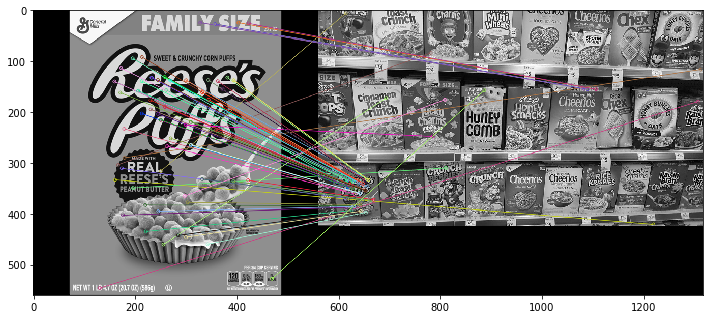

In [30]:
display(sift_matches)

In [88]:
sift = cv2.xfeatures2d.SIFT_create()

In [89]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [90]:
# Flann parameter

In [91]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,tress=5)
search_params = dict(checks=50)

In [92]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [93]:
matches = flann.knnMatch(des1,des2,k=2)

In [94]:
matchesMask = [[0,0] for i in range(len(matches))]

In [95]:
#matchMask

In [96]:

# Less distance == better match
# Ratio Test
for i,(match1,match2) in enumerate(matches):
    # If match1 distance is less than 75% of match2 distance
    # then descriptor was a good match, Lets keep it
    if match1.distance < 0.70*match2.distance:
        matchesMask[i] = [1,0]

In [99]:
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask = matchesMask,
                   flags=0)

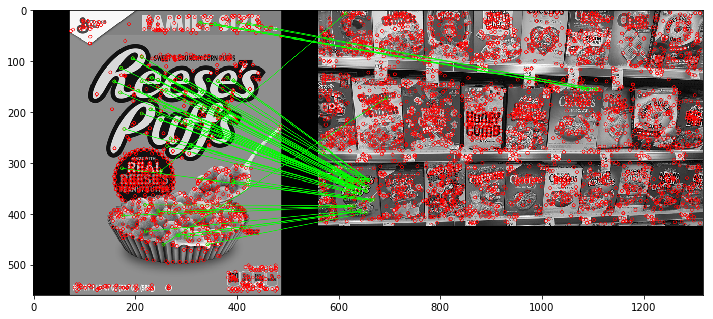

In [100]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)